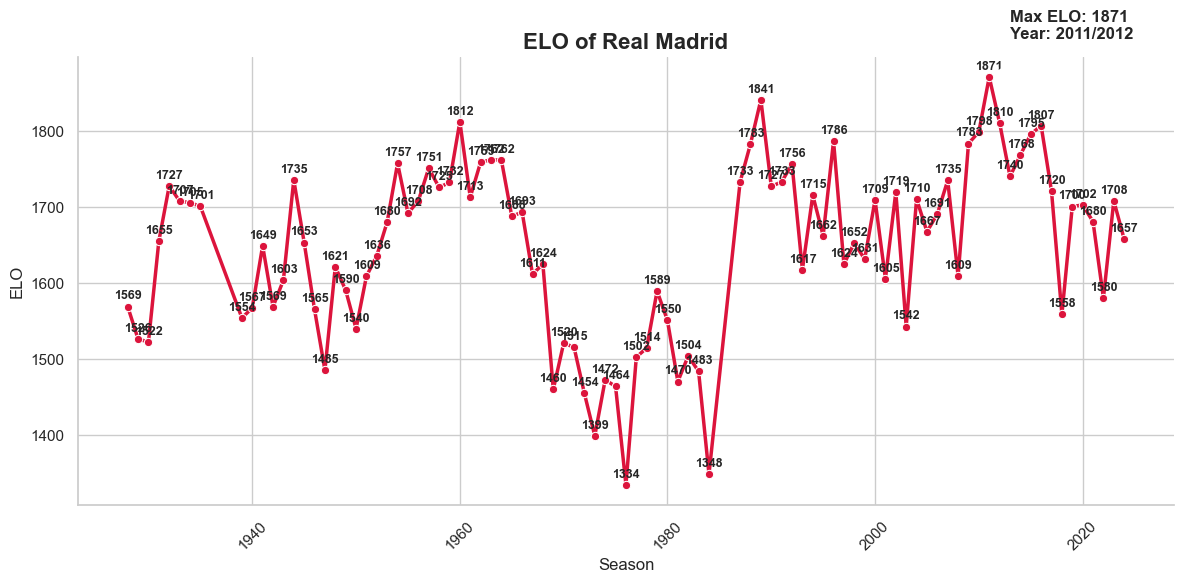

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("General_ELO.csv")

team = "Real Madrid" 
df_team = df[df["Equipo"] == team].copy()


df_team["Año_num"] = df_team["Año"].apply(lambda x: int(x.split("/")[0]))
df_team = df_team.sort_values("Año_num")

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))


sns.lineplot(data=df_team, x="Año_num", y="ELO", marker="o", linewidth=2.5, color="crimson")

for x, y in zip(df_team["Año_num"], df_team["ELO"]):
    plt.text(x, y + 10, f"{y:.0f}", ha="center", fontsize=9, fontweight="bold")

max_row = df_team.loc[df_team["ELO"].idxmax()]
plt.annotate(
    f'Max ELO: {max_row["ELO"]:.0f}\nYear: {max_row["Año"]}',
    xy=(max_row["Año_num"], max_row["ELO"]),
    xytext=(max_row["Año_num"] + 2, max_row["ELO"] + 50),
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
    fontsize=12,
    fontweight='bold'
)

plt.title(f"ELO of {team}", fontsize=16, fontweight="bold")
plt.xlabel("Season")
plt.ylabel("ELO")
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()
